In [22]:
import pandas as pd
import win32com.client
import time

Excel file, open, refresh and close

In [23]:
# Start an instance of Excel
xlapp = win32com.client.DispatchEx("Excel.Application")

# Open the workbook in said instance of Excel
wb = xlapp.workbooks.open(r'C:\Users\belig\OneDrive\Python\MeuProjeto\Projetos\dash_investimentos\dash_finance\infos.xlsx')

# Optional, e.g. if you want to debug
xlapp.Visible = True

# Refresh all data connections.
wb.RefreshAll()
wb.Save()

# Quit
xlapp.Quit()

In [28]:
base_dash_df = pd.read_excel(
    r'base_dash.xlsx', index_col=[0])
infos_df = pd.read_excel(
    r'infos.xlsx', index_col=[0])
display(base_dash_df)
display(infos_df)


,Data,Fundos de Investimentos,Fundos Imobiliários,Ações,COE,Renda Fixa,Disponível,Cripto,Dow Jones,Total
NaN,20/07/2022,117484.14,487055.63,14198.81,5000,13415.65,13175.88,4407.69,68900.00,723637.80
NaN,27/07/2022,122779.91,533358.48,13490.60,5000,13416.94,1096.02,4407.69,68900.00,762449.64
NaN,28/07/2022,122899.81,533217.58,14025.40,5000,13414.85,1096.02,4407.69,68900.00,762961.35
NaN,08/08/2022,123428.76,535534.83,14904.06,5000,13400.25,"2.591,90",4407.69,68900.00,765575.59
NaN,09/08/2022,123489.84,538180.19,14763.26,5000,13398.16,"2.591,90",4407.69,68900.00,768139.14
NaN,11/08/2022,123615.01,535089.68,14398.16,5000,13392.04,"2.591,90",4842.39,90577.65,786480.23
NaN,13/08/2022,123678.97,540386.52,14431.89,5000,13389.83,"5.706,41",4842.39,90577.65,792307.25
NaN,16/08/2022,123742.97,542476.77,14873.15,5000,13385.41,"5.706,41",4842.39,90577.65,794898.34


,Data,Fundos de Investimentos,Fundos Imobiliários,Ações,COE,Renda Fixa,Disponível,Cripto,Dow Jones,Total
NaN,16/08/2022,123742.97,542476.77,14873.15,5000,13385.41,"5.706,41",4965.27,92513.25,796956.82


Concatenar com novas infos

In [26]:
bases_df = [base_dash_df, infos_df]
base_dash_df = pd.concat(bases_df,)
print(base_dash_df)
base_dash_df.to_excel(r'base_dash.xlsx')


           Data  Fundos de Investimentos  Fundos Imobiliários     Ações   COE  \
NaN  20/07/2022                117484.14            487055.63  14198.81  5000   
NaN  27/07/2022                122779.91            533358.48  13490.60  5000   
NaN  28/07/2022                122899.81            533217.58  14025.40  5000   
NaN  08/08/2022                123428.76            535534.83  14904.06  5000   
NaN  09/08/2022                123489.84            538180.19  14763.26  5000   
NaN  11/08/2022                123615.01            535089.68  14398.16  5000   
NaN  13/08/2022                123678.97            540386.52  14431.89  5000   
NaN  13/08/2022                123678.97            540386.52  14431.89  5000   
NaN  16/08/2022                123742.97            542476.77  14873.15  5000   

     Renda Fixa Disponível   Cripto  Dow Jones      Total  
NaN    13415.65   13175.88  4407.69   68900.00  723637.80  
NaN    13416.94    1096.02  4407.69   68900.00  762449.64  
NaN    13

,Data,Fundos de Investimentos,Fundos Imobiliários,Ações,COE,Renda Fixa,Disponível,Cripto,Dow Jones,Total
NaN,20/07/2022,117484.14,487055.63,14198.81,5000,13415.65,13175.88,4407.69,68900.00,723637.80
NaN,27/07/2022,122779.91,533358.48,13490.60,5000,13416.94,1096.02,4407.69,68900.00,762449.64
NaN,28/07/2022,122899.81,533217.58,14025.40,5000,13414.85,1096.02,4407.69,68900.00,762961.35
NaN,08/08/2022,123428.76,535534.83,14904.06,5000,13400.25,"2.591,90",4407.69,68900.00,765575.59
NaN,09/08/2022,123489.84,538180.19,14763.26,5000,13398.16,"2.591,90",4407.69,68900.00,768139.14
NaN,11/08/2022,123615.01,535089.68,14398.16,5000,13392.04,"2.591,90",4842.39,90577.65,786480.23
NaN,13/08/2022,123678.97,540386.52,14431.89,5000,13389.83,"5.706,41",4842.39,90577.65,792307.25
NaN,13/08/2022,123678.97,540386.52,14431.89,5000,13389.83,"5.706,41",4842.39,90577.65,792307.25
NaN,16/08/2022,123742.97,542476.77,14873.15,5000,13385.41,"5.706,41",4842.39,90577.65,794898.34


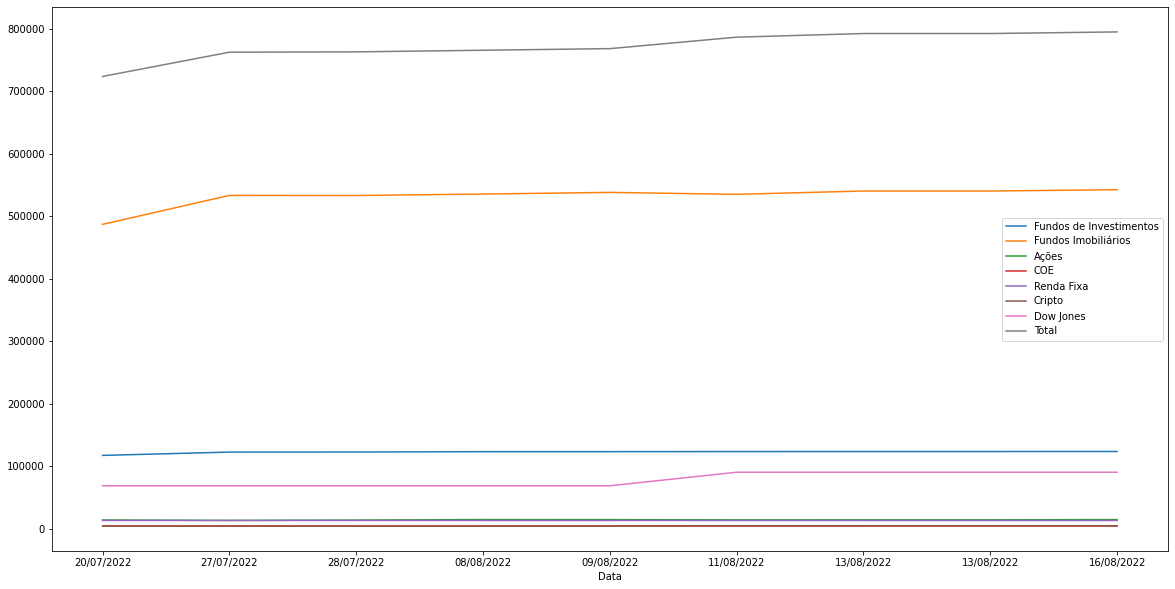

In [27]:
base_dash_df.plot(x="Data", figsize=(20, 10))
display(base_dash_df)

In [ ]:
# from tkinter import *
# from tkinter import messagebox
# janela = Tk()
# messagebox.showinfo('Status', 'Processo Concluído.')
# janela.destroy